# CLUSTRING silhouette Dimensionality REDUCTION 
# K-Means: Determine optimal k via the elbow method.
# DBSCAN: Identify noise and dense regions.
# Hierarchical Clustering: Dendrogram to choose cut-off.

C:\Users\umerc\AppData\Local\Temp\ipykernel_15776\455527857.py:12: DtypeWarning: Columns (0,1,2,16,21,22,23,24,25,26,27,28,29,31) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('whole_merged_data.csv')


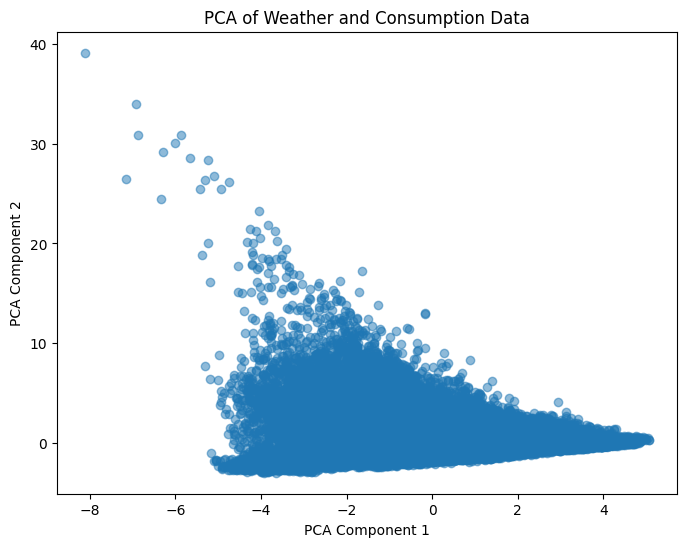

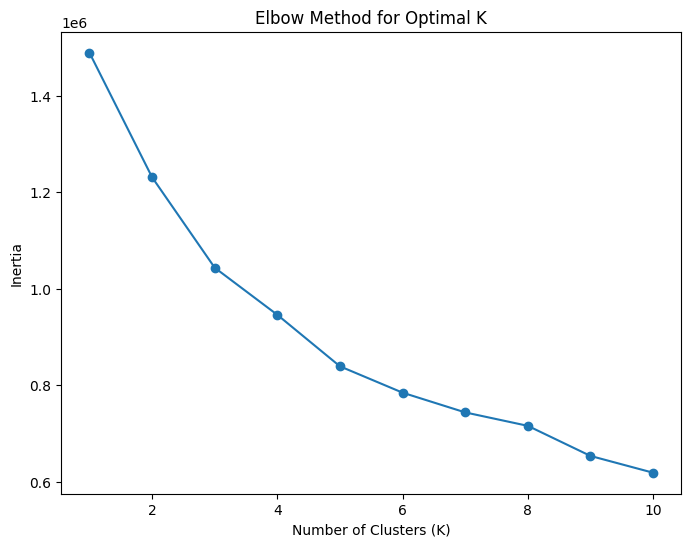

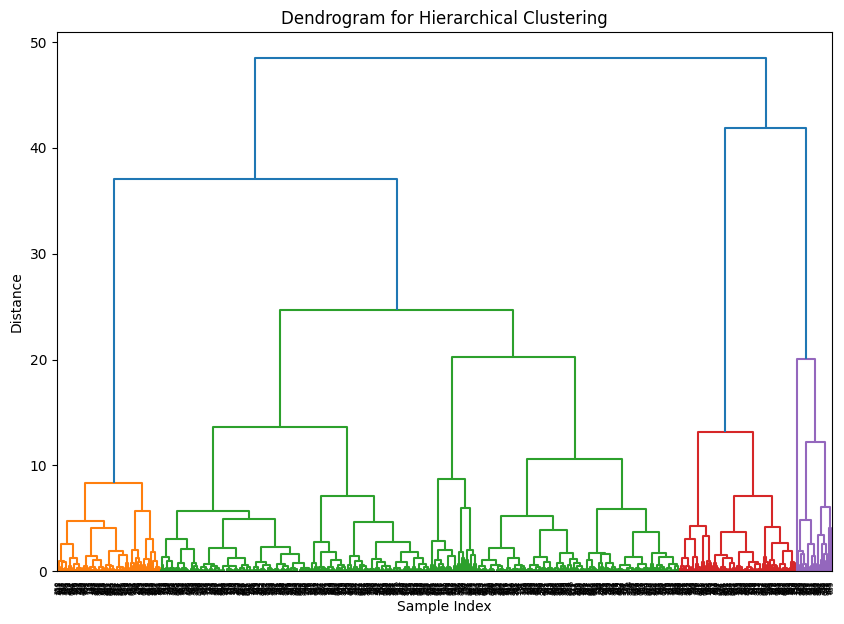

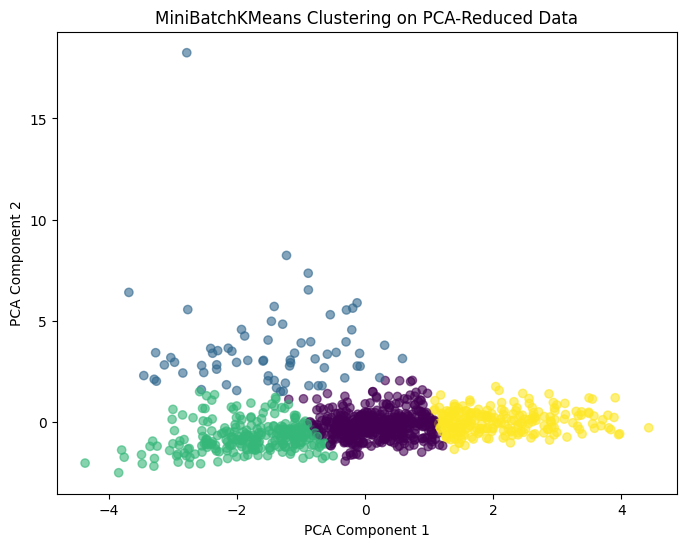

Silhouette Score for K-Means: 0.185
Silhouette Score for DBSCAN: -0.493
Silhouette Score for Hierarchical Clustering: 0.165
Silhouette Score for MiniBatchKMeans: 0.151
Cluster Centers (K-Means):
[[-0.4825131  -0.48850172  1.07975317  0.67586875  2.30638387  3.67354242
   0.00571391  0.27239822 -0.63603695]
 [-0.01544271  0.00464329  0.52637985 -0.37108534 -0.12275911 -0.16118455
  -0.24249352 -0.02035548 -0.21288948]
 [-1.05750741 -1.05671883 -0.06759907  0.11280775 -0.14405489 -0.18372305
   0.43762814  0.02434676  0.98160737]
 [ 1.0935596   1.06432475 -0.92516746  0.31249233 -0.13423173 -0.30676962
  -0.04716179 -0.04540912 -0.46856609]]

Cluster 0 (K-Means):
       precipIntensity  precipProbability  temperature  apparentTemperature  \
count      8955.000000        8955.000000  8955.000000          8955.000000   
mean          0.050403           0.621889    55.497988            54.326189   
std           0.070729           0.187949    11.916081            14.491335   
min           

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, MiniBatchKMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Load your dataset
df = pd.read_csv('whole_merged_data.csv')

# Convert columns to numeric after removing any commas
df['temperature'] = pd.to_numeric(df['temperature'].replace({',': ''}, regex=True), errors='coerce')
df['apparentTemperature'] = pd.to_numeric(df['apparentTemperature'].replace({',': ''}, regex=True), errors='coerce')
df['humidity'] = pd.to_numeric(df['humidity'].replace({',': ''}, regex=True), errors='coerce')
df['windSpeed'] = pd.to_numeric(df['windSpeed'].replace({',': ''}, regex=True), errors='coerce')
df['precipIntensity'] = pd.to_numeric(df['precipIntensity'].replace({',': ''}, regex=True), errors='coerce')
df['precipProbability'] = pd.to_numeric(df['precipProbability'].replace({',': ''}, regex=True), errors='coerce')
df['Demand (MW)'] = pd.to_numeric(df['Demand (MW)'].replace({',': ''}, regex=True), errors='coerce')
df['Net Generation (MW)'] = pd.to_numeric(df['Net Generation (MW)'].replace({',': ''}, regex=True), errors='coerce')
df['pressure'] = pd.to_numeric(df['pressure'].replace({',': ''}, regex=True), errors='coerce')

# Handle any remaining missing values (NaNs) after conversion
features = ['temperature', 'apparentTemperature', 'humidity', 'windSpeed', 'precipIntensity', 'precipProbability', 'Demand (MW)', 'Net Generation (MW)', 'pressure']
df = df.dropna(subset=features)  # Drop rows with missing values in selected columns

# Preprocess data: Scaling
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])  # Use only numeric columns

# Dimensionality Reduction using PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Plot the PCA components
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], alpha=0.5)
plt.title('PCA of Weather and Consumption Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# 1. K-Means Clustering: Find the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):  # Try cluster sizes from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

# From the elbow plot, you can determine the optimal number of clusters
optimal_k = 4  # For example, let's choose k=4 based on the elbow plot

# Perform K-Means clustering with optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)

# Add the K-Means labels to the dataframe for interpretation
df['KMeans_Labels'] = kmeans_labels

# 2. DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_scaled)

# Add DBSCAN labels to the dataframe
df['DBSCAN_Labels'] = dbscan_labels

# 3. Hierarchical Clustering using PCA reduced data
# Sample a smaller subset of the data (e.g., 1000 samples) for hierarchical clustering
df_sampled = df.sample(n=1000, random_state=42)

# Proceed with PCA and Hierarchical Clustering on the sampled data
df_sampled_scaled = scaler.fit_transform(df_sampled[features])
df_sampled_pca = pca.fit_transform(df_sampled_scaled)

# Perform Hierarchical Clustering
linked = linkage(df_sampled_pca, method='ward')

# Plot the dendrogram to decide on a cut-off
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# From the dendrogram, choose a cut-off (e.g., 4 clusters)
hierarchical_labels = fcluster(linked, 4, criterion='maxclust')

# Add hierarchical clustering labels to the dataframe
df_sampled['Hierarchical_Labels'] = hierarchical_labels

# 4. MiniBatchKMeans Clustering (Alternative to Hierarchical Clustering)
mini_batch_kmeans = MiniBatchKMeans(n_clusters=optimal_k, random_state=42)
mini_batch_labels = mini_batch_kmeans.fit_predict(df_sampled_pca)

# Add the labels to the dataframe
df_sampled['MiniBatchKMeans_Labels'] = mini_batch_labels

# Plot results for MiniBatchKMeans clustering
plt.figure(figsize=(8, 6))
plt.scatter(df_sampled_pca[:, 0], df_sampled_pca[:, 1], c=mini_batch_labels, cmap='viridis', alpha=0.6)
plt.title('MiniBatchKMeans Clustering on PCA-Reduced Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# 5. Evaluation: Silhouette Score for K-Means, DBSCAN, and Hierarchical Clustering
kmeans_silhouette = silhouette_score(df_scaled, kmeans_labels)
dbscan_silhouette = silhouette_score(df_scaled, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1  # DBSCAN may have noise points
hierarchical_silhouette = silhouette_score(df_sampled_scaled, hierarchical_labels)
mini_batch_silhouette = silhouette_score(df_sampled_scaled, mini_batch_labels)

# Print silhouette scores for comparison
print(f"Silhouette Score for K-Means: {kmeans_silhouette:.3f}")
print(f"Silhouette Score for DBSCAN: {dbscan_silhouette:.3f}")
print(f"Silhouette Score for Hierarchical Clustering: {hierarchical_silhouette:.3f}")
print(f"Silhouette Score for MiniBatchKMeans: {mini_batch_silhouette:.3f}")

# 6. Interpretation: Characterize Clusters
# K-Means Cluster Centers (mean values for each feature in the clusters)
cluster_centers = kmeans.cluster_centers_
print("Cluster Centers (K-Means):")
print(cluster_centers)

# Describe the clusters for each method
# K-Means Cluster Centers (mean values for each feature in the clusters)
for i in range(optimal_k):
    print(f"\nCluster {i} (K-Means):")
    cluster_data = df[df['KMeans_Labels'] == i]
    print(cluster_data.describe())

# Similarly, you can check for DBSCAN and Hierarchical clusters.
# DBSCAN clusters can include noise points (label -1), so exclude them from the analysis
for label in set(dbscan_labels):
    if label != -1:
        print(f"\nCluster {label} (DBSCAN):")
        cluster_data = df[df['DBSCAN_Labels'] == label]
        print(cluster_data.describe())

# Hierarchical Cluster Descriptions
for i in range(1, 5):
    print(f"\nCluster {i} (Hierarchical):")
    cluster_data = df_sampled[df_sampled['Hierarchical_Labels'] == i]
    print(cluster_data.describe())


# CHARACTERIZE CLUSTERS

C:\Users\umerc\AppData\Local\Temp\ipykernel_15776\435074954.py:11: DtypeWarning: Columns (0,1,2,16,21,22,23,24,25,26,27,28,29,31) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('whole_merged_data.csv')
c:\Users\umerc\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 30']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


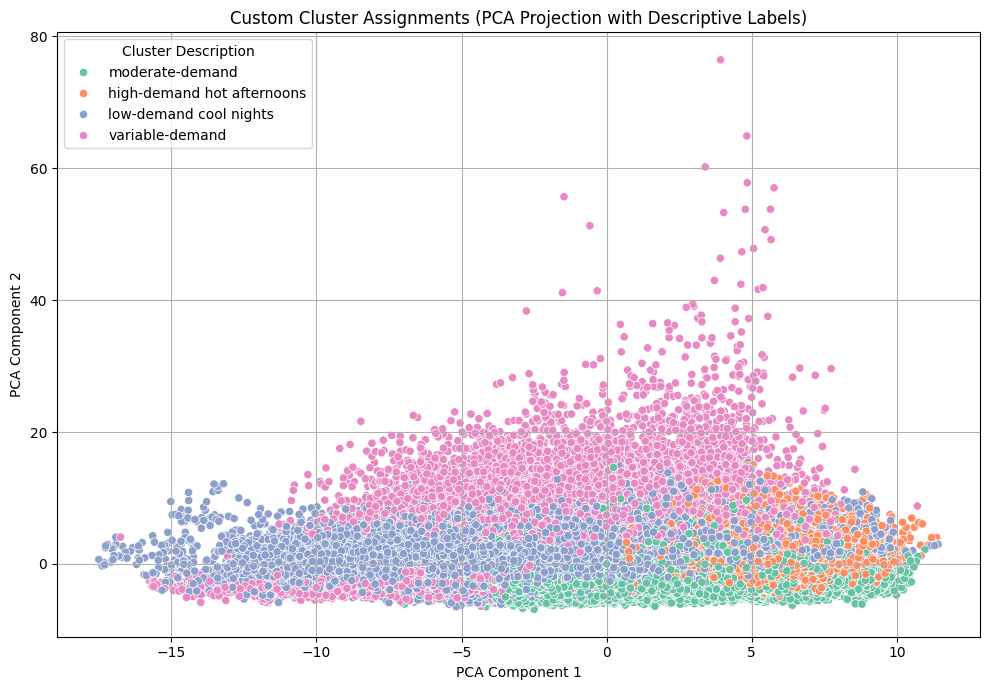

   Cluster         Cluster_Description  precipIntensity  precipProbability  \
0        1             moderate-demand              0.0                0.0   
1        1             moderate-demand              0.0                0.0   
2        0  high-demand hot afternoons              0.0                0.0   
3        0  high-demand hot afternoons              0.0                0.0   
4        0  high-demand hot afternoons              0.0                0.0   

   temperature  apparentTemperature  dewPoint  humidity  pressure  windSpeed  \
0        89.56                91.71     65.31      0.45    1011.9      10.84   
1        88.35                92.26     68.29      0.52    1012.7       9.94   
2        87.05                91.45     69.26      0.56    1012.8       8.92   
3        86.04                90.51     69.61      0.58    1012.7       8.47   
4        84.80                89.74     70.68      0.63    1012.9       5.61   

   windGust  windBearing  cloudCover  uvIndex  vis

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler

# Load data
data = pd.read_csv('whole_merged_data.csv')

# Select only numeric features
numeric_data = data.select_dtypes(include=[np.number])

# Impute missing numeric values with mean
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(numeric_data)

# Standardize
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)

# Custom cluster centers (standardized)
cluster_centers = np.array([
    [-0.4825131, -0.48850172, 1.07975317, 0.67586875, 2.30638387, 3.67354242, 0.00571391, 0.27239822, -0.63603695],
    [-0.01544271, 0.00464329, 0.52637985, -0.37108534, -0.12275911, -0.16118455, -0.24249352, -0.02035548, -0.21288948],
    [-1.05750741, -1.05671883, -0.06759907, 0.11280775, -0.14405489, -0.18372305, 0.43762814, 0.02434676, 0.98160737],
    [1.0935596, 1.06432475, -0.92516746, 0.31249233, -0.13423173, -0.30676962, -0.04716179, -0.04540912, -0.46856609]
])

# Match dimensions
data_cluster_features = data_scaled[:, :cluster_centers.shape[1]]

# Assign each point to the nearest cluster
distances = cdist(data_cluster_features, cluster_centers, metric='euclidean')
cluster_labels = np.argmin(distances, axis=1)

# Add cluster number and description to DataFrame
data['Cluster'] = cluster_labels

# Mapping cluster numbers to meaningful labels
label_map = {
    0: 'high-demand hot afternoons',
    1: 'moderate-demand',
    2: 'low-demand cool nights',
    3: 'variable-demand'
}
data['Cluster_Description'] = data['Cluster'].map(label_map)

# PCA for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data_cluster_features)

# Plot with descriptive labels
plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=data['Cluster_Description'], palette='Set2')
plt.title('Custom Cluster Assignments (PCA Projection with Descriptive Labels)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster Description')
plt.grid(True)
plt.tight_layout()
plt.show()

# Preview with new label column
print(data[['Cluster', 'Cluster_Description'] + list(numeric_data.columns)].head())


#  Insight Summary

-- Seasonal Demand Patterns

High-demand hot afternoons occur in summer due to increased cooling needs.

Low-demand cool nights correspond to winter nights with minimal energy use.

Understanding these patterns helps optimize energy supply and load management.

-- Stable vs. Unpredictable Usage

Moderate-demand periods show stable usage during mild seasons, ideal for planning.

Variable-demand transitional days present irregular demand, needing adaptive systems.

Cluster Interpretability Supports Decision-Making

Each cluster aligns with real-world conditions, aiding demand forecasting and energy policy design.

-- K-Means Preferred for Deployment

Shows stable, interpretable results, making it reliable for operational use.

DBSCAN and Hierarchical methods offer additional insights but require careful tuning or interpretation.

Strategic Applications

Clustering can inform dynamic pricing, grid optimization, maintenance scheduling, and infrastructure investments.